In [ ]:
import pandas as pd 

df = pd.read_csv("thailand_data.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3312\3640320618.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("thailand_data.csv")


In [29]:
import datetime

df['announce_date'] = pd.to_datetime(df['announce_date'],dayfirst=True)
filtered_df = df[df['announce_date'].dt.date >= datetime.date(year=2021,month=4,day=1)]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3312\2578059922.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  t = ax.set_xticklabels(ax.get_xticklabels(),fontproperties=fontprop)


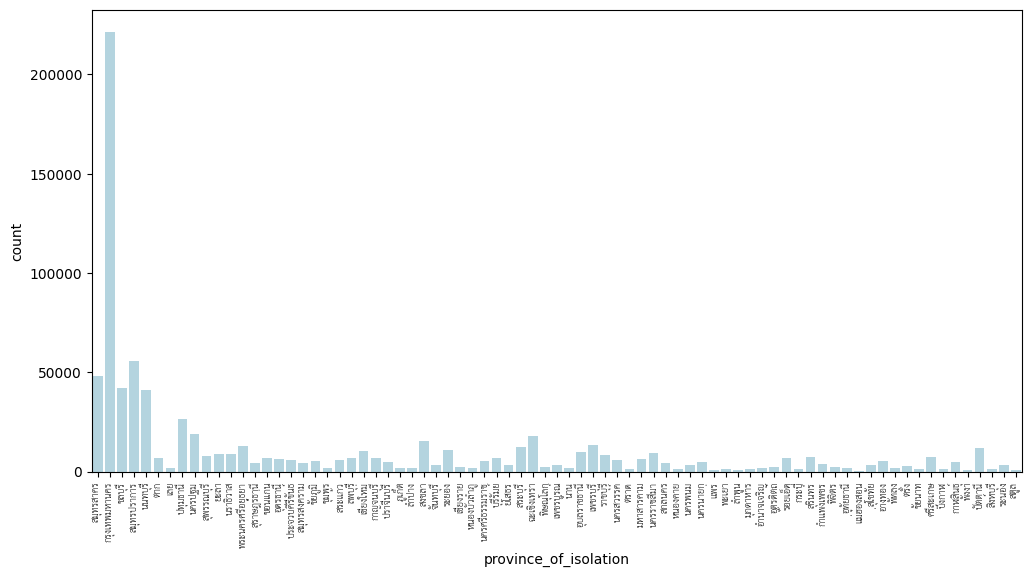

In [18]:
import seaborn as sbs
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,6))
fontprop = fm.FontProperties(fname="THSarabunNew.ttf")
ax = sbs.countplot(data=filtered_df,x='province_of_isolation',color='lightblue')
t = ax.set_xticklabels(ax.get_xticklabels(),fontproperties=fontprop)
t = plt.xticks(rotation=90)


In [31]:
filtered_df.dtypes

No.                               int64
announce_date            datetime64[ns]
Notified date                    object
sex                              object
age                              object
Unit                             object
nationality                      object
province_of_isolation            object
risk                             object
province_of_onset                object
district_of_onset                object
dtype: object

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3312\3750846682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age'] = filtered_df['age'].replace('55/664',0)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3312\3750846682.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbs.distplot(filtered_df['age'],bins=20)


<Axes: xlabel='age', ylabel='Density'>

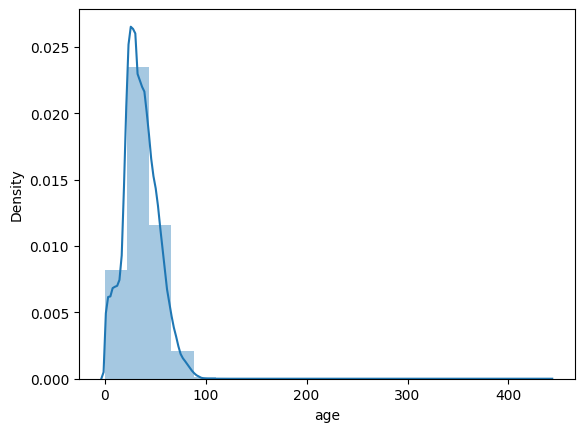

In [32]:
filtered_df['age'] = filtered_df['age'].replace('55/664',0)
sbs.distplot(filtered_df['age'],bins=20)

In [35]:
show_df = filtered_df.groupby(['province_of_isolation','announce_date']).count()['No.'].reset_index().pivot(index='announce_date',columns='province_of_isolation',values='No.').fillna(0)

In [36]:
show_df.corr()

province_of_isolation,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,...,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
province_of_isolation,,,,,,,,,,,,,,,,,,,,,
กระบี่,1.000000,0.362112,0.244498,0.300061,0.291469,0.227796,0.241774,0.255492,0.330228,0.346250,...,0.298079,0.283376,0.300072,0.259132,-0.024464,-0.047630,0.304752,0.380192,0.344854,0.242323
กรุงเทพมหานคร,0.362112,1.000000,0.665173,0.776894,0.741772,0.669110,0.664513,0.734019,0.800082,0.777264,...,0.744541,0.765340,0.732574,0.522698,0.191052,0.165128,0.724735,0.773110,0.704864,0.548802
กาญจนบุรี,0.244498,0.665173,1.000000,0.763581,0.773384,0.585676,0.622847,0.668638,0.775133,0.786061,...,0.693313,0.784668,0.744705,0.513730,-0.023766,0.046007,0.753923,0.802910,0.717203,0.705925
กาฬสินธุ์,0.300061,0.776894,0.763581,1.000000,0.904308,0.804769,0.751862,0.808162,0.931051,0.901991,...,0.896707,0.885488,0.888789,0.639754,-0.033133,0.068310,0.820105,0.911379,0.847526,0.649646
กำแพงเพชร,0.291469,0.741772,0.773384,0.904308,1.000000,0.785750,0.688094,0.762280,0.894127,0.867259,...,0.791482,0.869094,0.881815,0.683618,-0.041974,0.047817,0.888586,0.942378,0.816972,0.643679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
เพชรบุรี,-0.047630,0.165128,0.046007,0.068310,0.047817,0.044246,0.047890,0.257947,0.049946,0.050461,...,0.071569,0.058446,0.060816,-0.049106,-0.058187,1.000000,0.048668,0.045187,0.035193,-0.003834
เพชรบูรณ์,0.304752,0.724735,0.753923,0.820105,0.888586,0.705677,0.697012,0.711692,0.858845,0.814660,...,0.682300,0.853374,0.877305,0.628200,-0.037913,0.048668,1.000000,0.878405,0.818164,0.591918
เลย,0.380192,0.773110,0.802910,0.911379,0.942378,0.821397,0.746056,0.772124,0.911539,0.887070,...,0.825257,0.894719,0.867598,0.659643,-0.033052,0.045187,0.878405,1.000000,0.835495,0.698324


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.draw()
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.draw()
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from current font.
  fig.canvas.draw()
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from current font.
  fig.canvas.draw()
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from current font.
  fig.canvas.draw()
c:\Users\ADMIN\AppData\Local\Pr

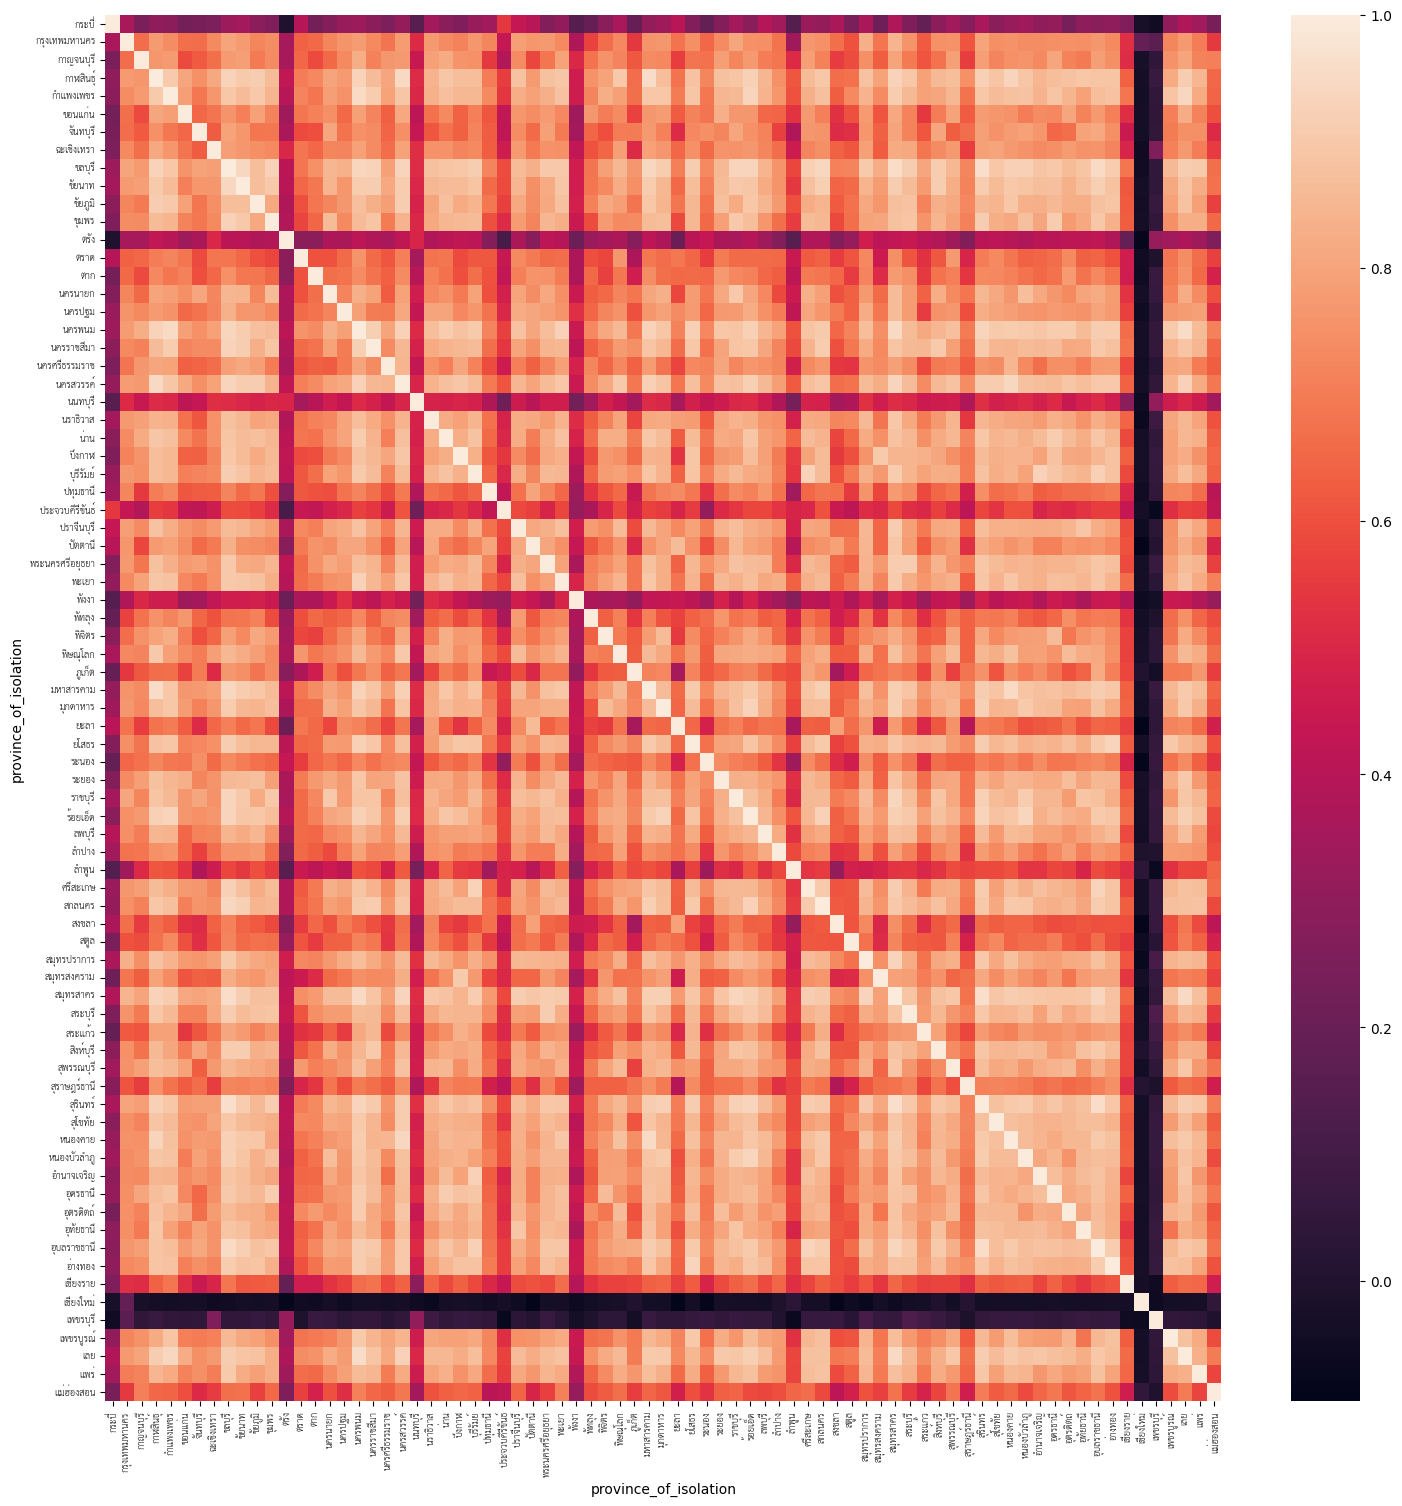

In [39]:
fig,ax = plt.subplots(figsize=(18,18))
ax = sbs.heatmap(show_df.corr())
t = ax.set_xticklabels(ax.get_xticklabels(),fontproperties=fontprop)
t = plt.xticks(rotation=90)
t = ax.set_yticklabels(ax.get_yticklabels(),fontproperties=fontprop)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3312\939982569.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  t = ax.set_xticklabels(ax.get_xticklabels(),fontproperties=fontprop,fontsize=18)
) missing from current font.ng\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  func(*args, **kwargs)
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font.
  func(*args, **kwargs)
C:\User

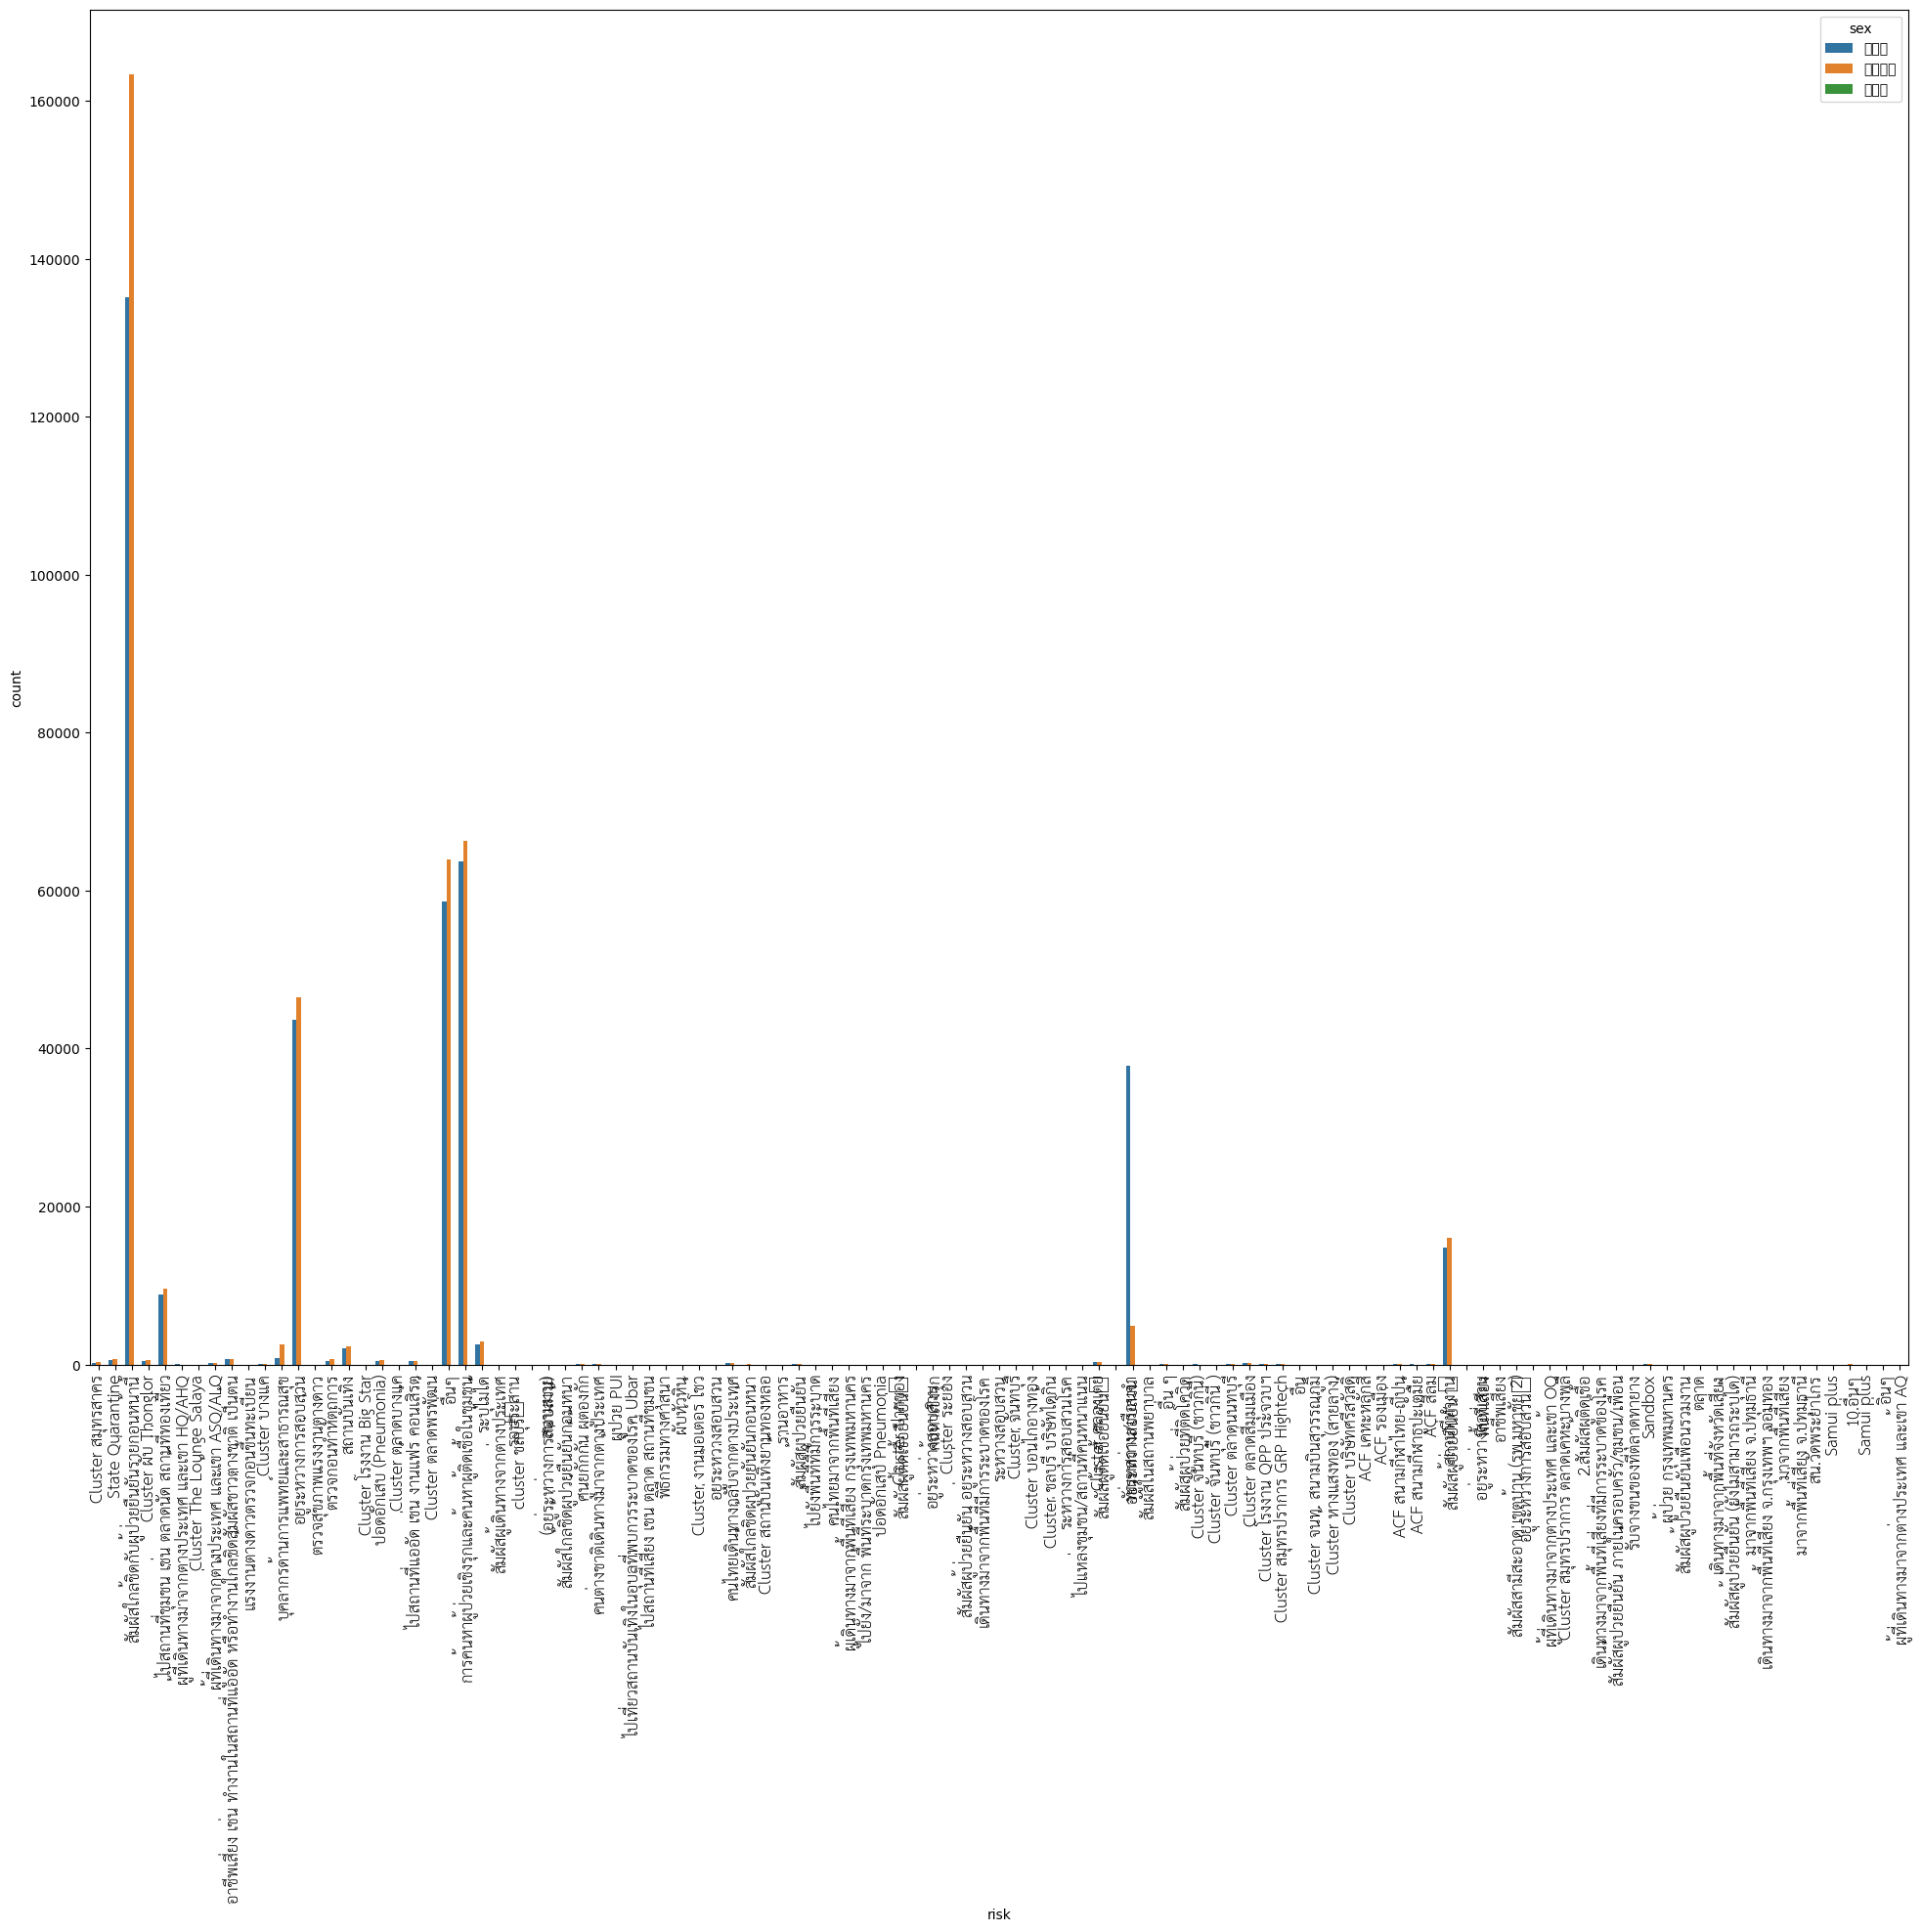

In [43]:
fig,ax = plt.subplots(figsize=(24,18))
ax = sbs.countplot(data=filtered_df,x='risk',hue='sex')
t = ax.set_xticklabels(ax.get_xticklabels(),fontproperties=fontprop,fontsize=18)
t = plt.xticks(rotation=90)

In [45]:
filtered_df.groupby(['risk','sex']).count()['No.'].reset_index()

,risk,sex,No.
0,Samui plus,ชาย,2
1,10.อื่นๆ,ชาย,9
2,10.อื่นๆ,หญิง,13
3,2.สัมผัสผู้ติดเชื้อ,ชาย,6
4,2.สัมผัสผู้ติดเชื้อ,หญิง,4
...,...,...,...
171,ไปสถานที่แออัด เช่น งานแฟร์ คอนเสิร์ต,ชาย,457
172,ไปสถานที่แออัด เช่น งานแฟร์ คอนเสิร์ต,หญิง,444
173,ไปเที่ยวสถานบันเทิงในอุบลที่พบการระบาดของโรค Ubar,หญิง,1
174,ไปแหล่งชุมชน/สถานที่คนหนาแน่น,ชาย,4


In [48]:
show_df = filtered_df.groupby(['announce_date','province_of_isolation']).count()['No.'].reset_index()

In [50]:
import plotly_express as px

px.line(show_df,x='announce_date',y='No.',color='province_of_isolation')

In [53]:
show_df = filtered_df.groupby(['announce_date','risk']).count()['No.'].reset_index()

In [54]:
px.line(show_df,x='announce_date',y='No.',color='risk')

In [57]:
show_df = filtered_df.groupby(['announce_date','province_of_isolation']).count()['No.'].reset_index().pivot(index='announce_date',columns='province_of_isolation',values='No.').fillna(0)

In [61]:
# If you want only one Line
import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Line(x=show_df.index,y=show_df['กรุงเทพมหานคร'],name='กรุงเทพมหานคร'))
fig.add_trace(go.Line(x=show_df.index,y=show_df['สมุทรสาคร'],name='สมุทรสาคร'))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [62]:
fig=go.Figure()
fig.add_trace(go.Bar(x=show_df.index,y=show_df['กรุงเทพมหานคร'],name='กรุงเทพมหานคร'))
fig.add_trace(go.Bar(x=show_df.index,y=show_df['สมุทรสาคร'],name='สมุทรสาคร'))